## Create two sagittal slices with a lesion

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function to plot slices in a 2x1 subplot
def plot_slices(slice1, slice2, title1, title2):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 4))
    
    im1 = ax1.imshow(slice1, cmap='gray', vmin=0, vmax=1)
    ax1.set_title(title1)
    ax1.axis('off')
    
    im2 = ax2.imshow(slice2, cmap='gray', vmin=0, vmax=1)
    ax2.set_title(title2)
    ax2.axis('off')
    
    plt.tight_layout()
    plt.show()

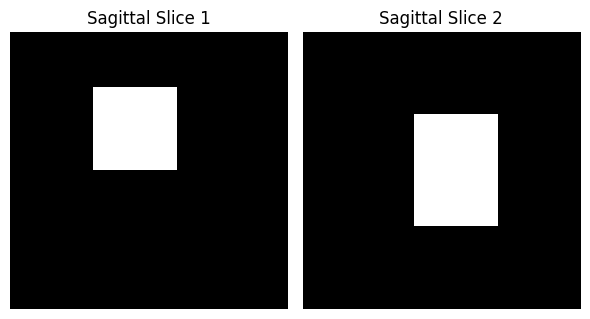

In [3]:
# Create two empty 2D arrays representing two sagittal slices
slice1 = np.zeros((10, 10))
slice2 = np.zeros((10, 10))

# Add dummy lesions (1 values) to each slice
slice1[2:5, 3:6] = 1
slice2[3:7, 4:7] = 1

# Plot original slices
plot_slices(slice1, slice2, "Sagittal Slice 1", "Sagittal Slice 2")

## Interpolate the slices

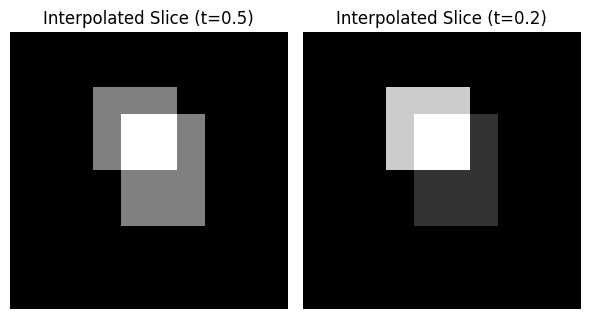

In [4]:
# Interpolate two slices using linear interplation
def interpolate_slices(slice1, slice2, t):
    return (1 - t) * slice1 + t * slice2

# Create interpolated slices
interpolated_05 = interpolate_slices(slice1, slice2, 0.5)
interpolated_02 = interpolate_slices(slice1, slice2, 0.2)

# Plot interpolated slices
plot_slices(interpolated_05, interpolated_02, "Interpolated Slice (t=0.5)", "Interpolated Slice (t=0.2)")

## Measure the lesion length

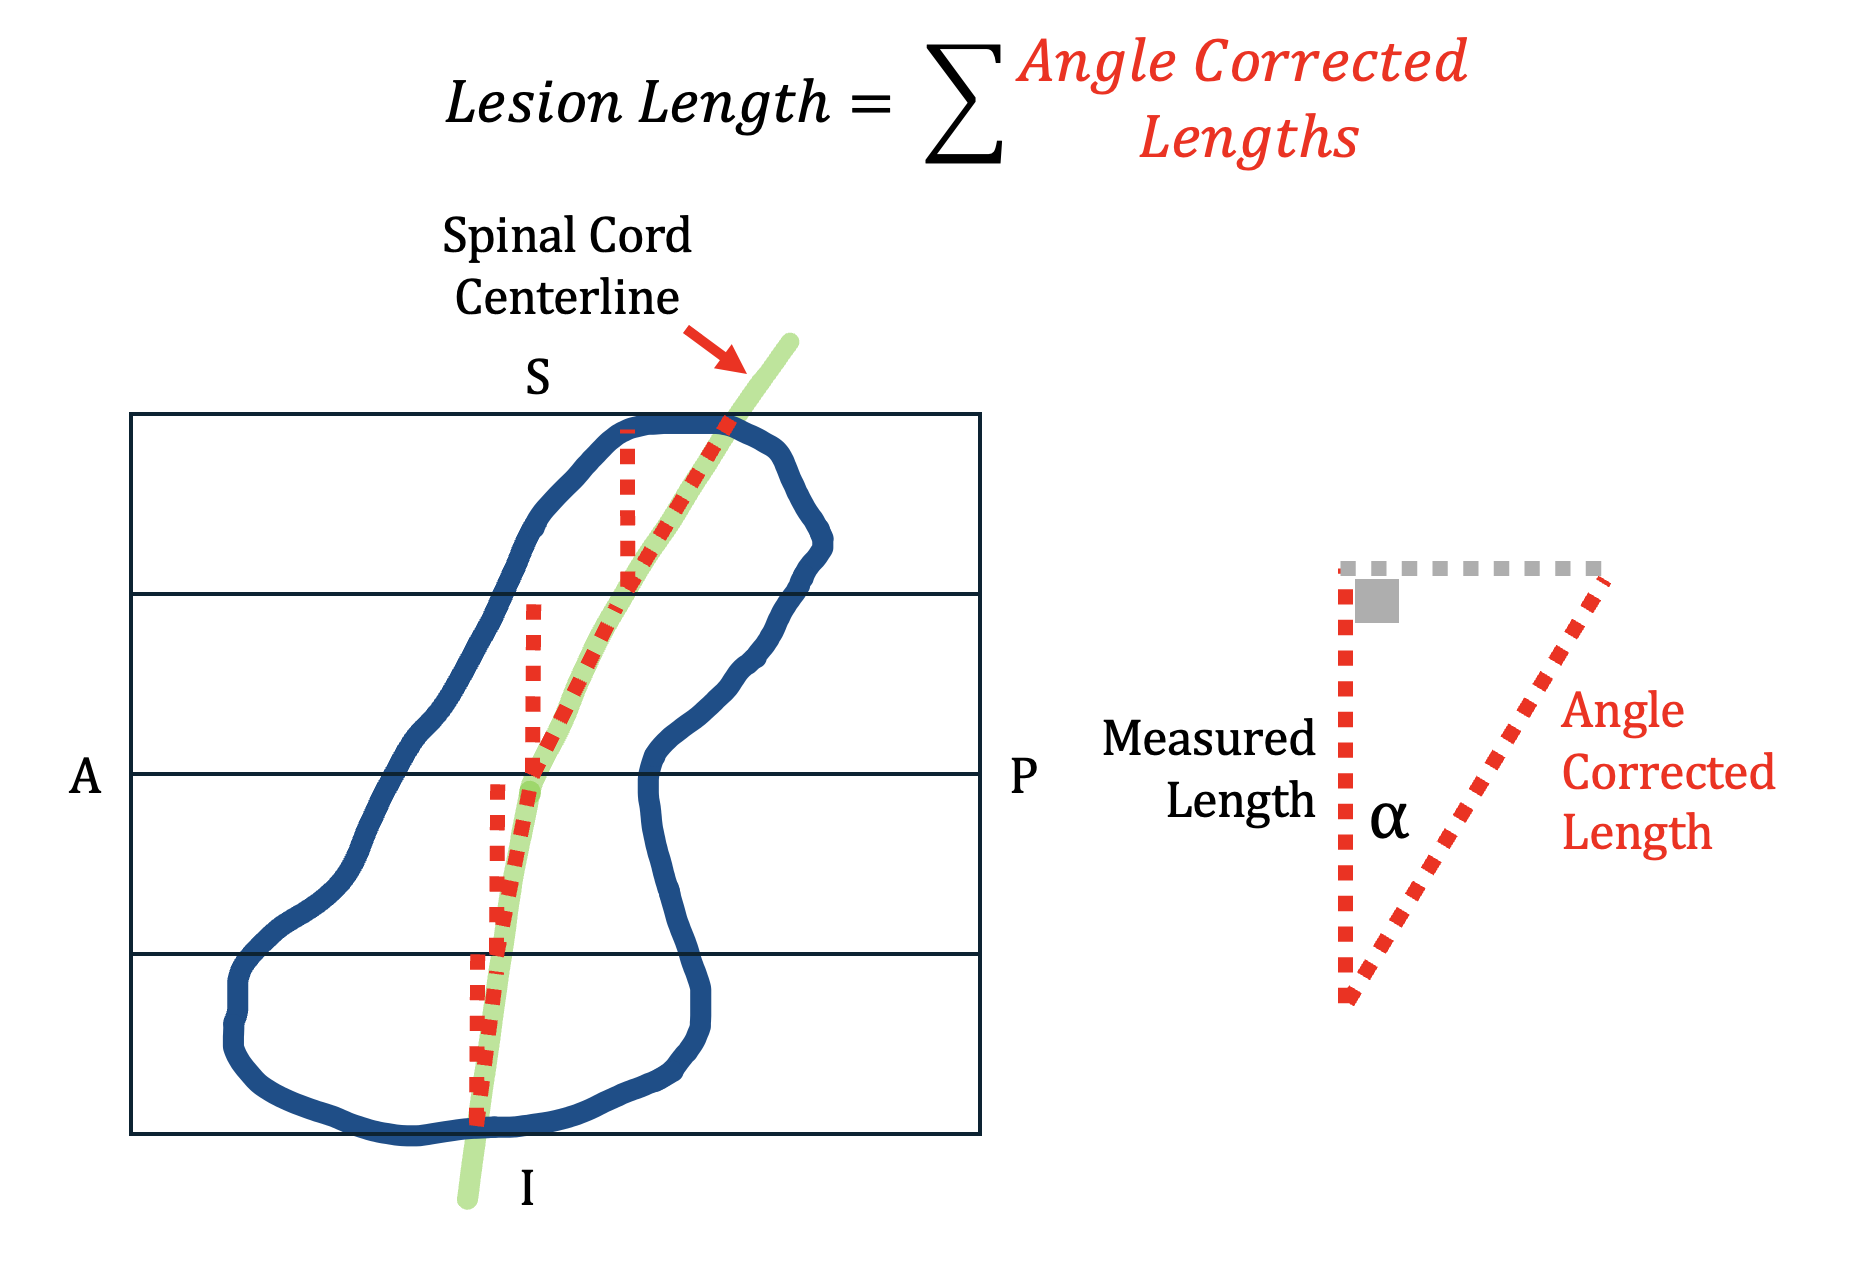

In [5]:
def measure_length(slice, p_lst, angles_sagittal):
    """
    Measure the length of the lesion along the superior-inferior axis in the provided sagittal slice 
    when taking into account the angle correction.
    :param slice: 2D numpy array: mask of the lesion. Can be binary or soft.
    :param p_lst: list, pixel size
    :param angles_sagittal: angles for the angle correction
    """
    print(f'{slice}\n')   # just for debug
    
    # Get a list of axial slice numbers that are nonzero in the slice
    nonzero_axial_slices = np.unique(np.where(slice)[1])  # [1] -> SI

    lengths = []
    # Loop across SI dimension
    for axial_slice in nonzero_axial_slices:
        array = slice[:, axial_slice]   # 2D -> 1D
        # Compute the mean of nonzero values
        nonzero_values = array[array > 0]
        mean_nonzero = np.mean(nonzero_values)
        # Compute the length for a given axial slice when taking into account 
        # the angle correction. Moreover, the length is weighted to account
        # for the softness (caused by the interpolation of two slices)
        length = mean_nonzero * p_lst[2] / np.cos(angles_sagittal[axial_slice])   # p_lst[2] -> pixel size of SI axis
        lengths.append(length)
        print(f'{array}; mean={mean_nonzero}; length={length}mm')   # just for debug

    length = np.sum(lengths)
    print(f'Total length={length}mm')

In [6]:
# Dummy variables for debugging
p_lst = (2.75, 0.34375, 0.34375)   # T2w sag pixdim
angles_sagittal = np.linspace(0.1, 0.5, interpolated_02.shape[1])   # Angles between the centerline and axial slices

## Non-Interpolated slice (i.e., binary mask)

In [7]:
measure_length(slice1, p_lst, angles_sagittal)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]; mean=1.0; length=0.3533247247819547mm
[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]; mean=1.0; length=0.3574521457247015mm
[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]; mean=1.0; length=0.3624013332202656mm
Total length=1.0731782037269217mm


## Interpolated slice (soft mask)

In [8]:
measure_length(interpolated_02, p_lst, angles_sagittal)

[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.8 0.8 0.8 0.  0.  0.  0. ]
 [0.  0.  0.  0.8 1.  1.  0.2 0.  0.  0. ]
 [0.  0.  0.  0.8 1.  1.  0.2 0.  0.  0. ]
 [0.  0.  0.  0.  0.2 0.2 0.2 0.  0.  0. ]
 [0.  0.  0.  0.  0.2 0.2 0.2 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]]

[0.  0.  0.8 0.8 0.8 0.  0.  0.  0.  0. ]; mean=0.8000000000000002; length=0.28265977982556384mm
[0.  0.  0.8 1.  1.  0.2 0.2 0.  0.  0. ]; mean=0.64; length=0.22876937326380897mm
[0.  0.  0.8 1.  1.  0.2 0.2 0.  0.  0. ]; mean=0.64; length=0.23193685326096997mm
[0.  0.  0.  0.2 0.2 0.2 0.2 0.  0.  0. ]; mean=0.2; length=0.07364538958318mm
Total length=0.8170113959335229mm
